In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# for korean plotting
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# Pandas option
pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv('assets.csv')

In [33]:
import statsmodels.api as sm

ols = sm.OLS(endog=np.log(df['거래금액']), exog=sm.add_constant(df['전용면적'],prepend=True))
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   거래금액   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     1886.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:28:38   Log-Likelihood:                -9078.5
No. Observations:                6379   AIC:                         1.816e+04
Df Residuals:                    6377   BIC:                         1.817e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0627      0.014    737.201      0.000      10.036      10.089
전용면적           0.0034   7.81e-05     43.432      0.000       0.003       0.004
==============================================================================
Omnibus:                      552.557   Durbin-Watson:                   0.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              845.593
Skew:                          -0.667   Prob(JB):                    2.41e-184
Kurtosis:                       4.184   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
df['조절가격'] = np.log(df['거래금액']) - 0.0034*df['전용면적']

<AxesSubplot:xlabel='조절가격', ylabel='Density'>

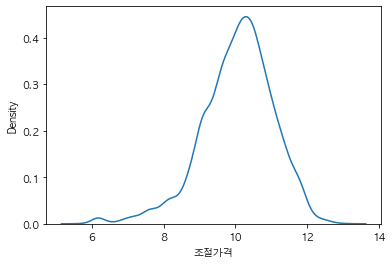

In [35]:
sns.kdeplot(df['조절가격'])

In [36]:
stats.shapiro(df['조절가격'])

/Users/dangchan/miniforge3/envs/spatial/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9756075143814087, pvalue=1.1602492470370382e-31)